In [1]:
# Looking at Denver Crime from Kaggle: 
# https://www.kaggle.com/paultimothymooney/denver-crime-data?select=offense_codes.csv

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"



In [3]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Dataset\Crime\offense_codes.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   OFFENSE_CODE            299 non-null    int64 
 1   OFFENSE_CODE_EXTENSION  299 non-null    int64 
 2   OFFENSE_TYPE_ID         299 non-null    object
 3   OFFENSE_TYPE_NAME       299 non-null    object
 4   OFFENSE_CATEGORY_ID     299 non-null    object
 5   OFFENSE_CATEGORY_NAME   299 non-null    object
 6   IS_CRIME                299 non-null    int64 
 7   IS_TRAFFIC              299 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 18.8+ KB


In [5]:
df.head(10)

,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_ID,OFFENSE_CATEGORY_NAME,IS_CRIME,IS_TRAFFIC
0,2804,1,stolen-property-possession,Possession of stolen property,all-other-crimes,All Other Crimes,1,0
1,2804,2,fraud-possess-financial-device,Possession of a financial device,all-other-crimes,All Other Crimes,1,0
2,2901,0,damaged-prop-bus,Damaged business property,public-disorder,Public Disorder,1,0
3,2902,0,criminal-mischief-private,Criminal mischief to private property,public-disorder,Public Disorder,1,0
4,2903,0,criminal-mischief-public,Criminal mischief to public property,public-disorder,Public Disorder,1,0
5,2999,0,criminal-mischief-other,Criminal mischief - other,public-disorder,Public Disorder,1,0
6,2999,1,criminal-mischief-mtr-veh,Criminal mischief to a motor vehicle,public-disorder,Public Disorder,1,0
7,2999,2,criminal-mischief-graffiti,Criminal mischief - graffiti,public-disorder,Public Disorder,1,0
8,3501,0,drug-hallucinogen-mfr,Manufacture of a hallucinogenic drug,drug-alcohol,Drug & Alcohol,1,0
9,3503,0,drug-hallucinogen-sell,Selling a hallucinogenic drug,drug-alcohol,Drug & Alcohol,1,0


In [6]:
df2 = pd.read_csv(r'C:\Users\HP\Desktop\Dataset\Crime\crime.csv')

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534103 entries, 0 to 534102
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   INCIDENT_ID             534103 non-null  int64  
 1   OFFENSE_ID              534103 non-null  int64  
 2   OFFENSE_CODE            534103 non-null  int64  
 3   OFFENSE_CODE_EXTENSION  534103 non-null  int64  
 4   OFFENSE_TYPE_ID         534103 non-null  object 
 5   OFFENSE_CATEGORY_ID     534103 non-null  object 
 6   FIRST_OCCURRENCE_DATE   534103 non-null  object 
 7   LAST_OCCURRENCE_DATE    176837 non-null  object 
 8   REPORTED_DATE           534103 non-null  object 
 9   INCIDENT_ADDRESS        484969 non-null  object 
 10  GEO_X                   529537 non-null  float64
 11  GEO_Y                   529537 non-null  float64
 12  GEO_LON                 529537 non-null  float64
 13  GEO_LAT                 529537 non-null  float64
 14  DISTRICT_ID         

In [53]:
df2.shape


(534103, 19)

In [8]:
df2.head(10)

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2018869789,2018869789239900,2399,0,theft-other,larceny,12/27/2018 3:58:00 PM,NaN,12/27/2018 4:51:00 PM,2681 N HANOVER CT,3178210.0,1700715.0,-104.866156,39.755561,5,512,stapleton,1,0
1,2015664356,2015664356544100,5441,0,traffic-accident,traffic-accident,11/13/2015 7:45:00 AM,NaN,11/13/2015 8:38:00 AM,4100 BLOCK W COLFAX AVE,3129148.0,1694748.0,-105.040760,39.739991,1,122,west-colfax,0,1
2,20176005213,20176005213239901,2399,1,theft-bicycle,larceny,6/8/2017 1:15:00 PM,6/8/2017 5:15:00 PM,6/12/2017 8:44:00 AM,1705 17TH ST,3140790.0,1699792.0,-104.999264,39.753669,6,612,union-station,1,0
3,20196012240,20196012240230800,2308,0,theft-from-bldg,larceny,12/7/2019 1:07:00 PM,12/7/2019 6:30:00 PM,12/9/2019 1:35:00 PM,1350 N IRVING ST,3132400.0,1694088.0,-105.029208,39.738134,1,122,west-colfax,1,0
4,2018861883,2018861883501600,5016,0,violation-of-restraining-order,all-other-crimes,12/22/2018 8:15:00 PM,12/22/2018 8:31:00 PM,12/22/2018 10:00:00 PM,13625 E RANDOLPH PL,3188580.0,1716158.0,-104.828868,39.797750,5,521,montbello,1,0
5,2018264446,2018264446131600,1316,0,threats-to-injure,public-disorder,3/29/2018 10:00:00 AM,4/17/2018 10:00:00 AM,4/20/2018 1:33:00 PM,1865 LARIMER ST,3142086.0,1699093.0,-104.994668,39.751731,6,612,union-station,1,0
6,2016461725,2016461725549900,5499,0,traf-other,all-other-crimes,7/21/2016 6:40:00 PM,NaN,7/21/2016 7:09:00 PM,N COLUMBINE ST / E 48TH AVE,3152605.0,1710822.0,-104.957009,39.783762,2,212,elyria-swansea,1,0
7,2017409119,2017409119549900,5499,0,traf-other,all-other-crimes,6/22/2017 5:20:00 PM,NaN,6/22/2017 5:20:00 PM,E COLFAX AVE / N DOWNING ST,3148176.0,1694866.0,-104.973097,39.740032,6,623,capitol-hill,1,0
8,2018473421,2018473421739902,7399,2,public-order-crimes-other,all-other-crimes,7/13/2018 8:22:00 AM,NaN,7/13/2018 10:11:00 AM,777 N BANNOCK ST,3143312.0,1690483.0,-104.990480,39.728076,1,123,lincoln-park,1,0
9,2016829592,2016829592110200,1102,0,sex-aslt-rape,sexual-assault,12/30/2016 11:00:00 PM,12/30/2016 11:45:00 PM,12/31/2016 4:59:00 AM,NaN,NaN,NaN,NaN,NaN,6,611,five-points,1,0


In [9]:
crime_cities =df2.NEIGHBORHOOD_ID.value_counts().head(10)
crime_cities.head(10)

# Based on this, five-points saw the most crime, followed by stapleton with 

five-points      28834
stapleton        22119
capitol-hill     19129
cbd              18819
montbello        18043
lincoln-park     14086
baker            14068
civic-center     13405
east-colfax      13227
union-station    13180
Name: NEIGHBORHOOD_ID, dtype: int64

In [10]:
crime_cities.tail(10)

five-points      28834
stapleton        22119
capitol-hill     19129
cbd              18819
montbello        18043
lincoln-park     14086
baker            14068
civic-center     13405
east-colfax      13227
union-station    13180
Name: NEIGHBORHOOD_ID, dtype: int64

<AxesSubplot:>

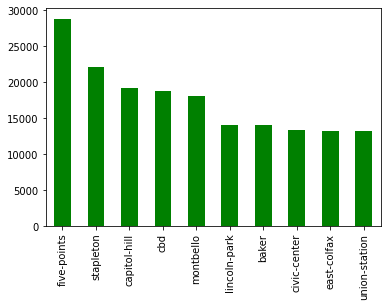

In [11]:
crime_cities.plot(kind='bar', color='green')


In [12]:
# https://stackoverflow.com/questions/47320572/pandas-groupby-and-count

cities_crime = df2.groupby(['NEIGHBORHOOD_ID', 'OFFENSE_CATEGORY_ID'])['OFFENSE_CATEGORY_ID'].count()

In [13]:
cities_crime

NEIGHBORHOOD_ID  OFFENSE_CATEGORY_ID     
athmar-park      aggravated-assault           211
                 all-other-crimes            1762
                 arson                         14
                 auto-theft                   528
                 burglary                     305
                                             ... 
windsor          robbery                       46
                 sexual-assault                60
                 theft-from-motor-vehicle     617
                 traffic-accident             949
                 white-collar-crime           124
Name: OFFENSE_CATEGORY_ID, Length: 1170, dtype: int64

In [14]:
cities_crime['five-points'].sort_values(ascending = False)

# We can now search for specifc neighborhood and compare them. 

OFFENSE_CATEGORY_ID
all-other-crimes                4803
traffic-accident                4500
drug-alcohol                    3715
public-disorder                 3294
larceny                         3220
theft-from-motor-vehicle        2667
other-crimes-against-persons    1990
auto-theft                      1240
aggravated-assault              1170
burglary                        1150
robbery                          453
sexual-assault                   326
white-collar-crime               247
arson                             35
murder                            24
Name: OFFENSE_CATEGORY_ID, dtype: int64

In [15]:
crimes_group = df2.groupby(['OFFENSE_CATEGORY_ID','NEIGHBORHOOD_ID'])['NEIGHBORHOOD_ID'].count()
crimes_group

OFFENSE_CATEGORY_ID  NEIGHBORHOOD_ID
aggravated-assault   athmar-park        211
                     auraria             49
                     baker              176
                     barnum             184
                     barnum-west         88
                                       ... 
white-collar-crime   west-colfax         85
                     west-highland       76
                     westwood            95
                     whittier            28
                     windsor            124
Name: NEIGHBORHOOD_ID, Length: 1170, dtype: int64

In [16]:
crimes_group['sexual-assault'].sort_values(ascending = False)

NEIGHBORHOOD_ID
five-points     326
capitol-hill    185
cbd             184
lincoln-park    179
montbello       177
               ... 
cory-merrill     12
skyland           9
country-club      5
indian-creek      3
wellshire         2
Name: NEIGHBORHOOD_ID, Length: 78, dtype: int64

In [17]:
crimes_group['aggravated-assault'].sort_values(ascending = False)

NEIGHBORHOOD_ID
five-points      1170
montbello         722
capitol-hill      573
union-station     551
cbd               507
                 ... 
cory-merrill       19
rosedale           16
country-club        9
indian-creek        8
wellshire           7
Name: NEIGHBORHOOD_ID, Length: 79, dtype: int64

In [18]:
crimes_group['white-collar-crime'].sort_values(ascending = False)

NEIGHBORHOOD_ID
dia             546
stapleton       294
cbd             291
montbello       263
five-points     247
               ... 
kennedy          21
skyland          21
rosedale         21
wellshire        17
central-park     11
Name: NEIGHBORHOOD_ID, Length: 79, dtype: int64

In [19]:
crimes_group['murder'].sort_values(ascending = False)
#Here we see that Montbello has the highest numbers of murders

NEIGHBORHOOD_ID
montbello              25
five-points            24
east-colfax            22
northeast-park-hill    19
westwood               16
                       ..
platt-park              1
congress-park           1
montclair               1
jefferson-park          1
city-park               1
Name: NEIGHBORHOOD_ID, Length: 69, dtype: int64

In [20]:
# Okay, here we can search for each category type, and see which neighborhood has the highest amount of each. But this is too long 
# Can we write 1 script that would give us the category_ID, and the neighborhood with the highest occurence of it, with the corresponding number?

In [21]:
max_crime_city = df2.groupby(['OFFENSE_CATEGORY_ID','NEIGHBORHOOD_ID'])['NEIGHBORHOOD_ID'].count().sort_values(ascending = False).reset_index(name="count").head(20)
max_crime_city

,OFFENSE_CATEGORY_ID,NEIGHBORHOOD_ID,count
0,traffic-accident,stapleton,7146
1,traffic-accident,baker,6428
2,all-other-crimes,civic-center,5227
3,all-other-crimes,montbello,4870
4,larceny,stapleton,4819
5,all-other-crimes,five-points,4803
6,traffic-accident,five-points,4500
7,traffic-accident,hampden-south,4370
8,all-other-crimes,cbd,4276
9,all-other-crimes,east-colfax,4057


In [22]:
max_crime_city.loc[max_crime_city.groupby('OFFENSE_CATEGORY_ID')['count'].idxmax()]

#Fucking shit. It works...Only after 2 hours of searching/reading...it was so simple..I suck
#https://stackoverflow.com/questions/55186262/pandas-groupby-and-then-select-a-row-by-value-of-column-min-max-for-example

,OFFENSE_CATEGORY_ID,NEIGHBORHOOD_ID,count
2,all-other-crimes,civic-center,5227
13,drug-alcohol,five-points,3715
4,larceny,stapleton,4819
18,public-disorder,five-points,3294
0,traffic-accident,stapleton,7146


In [23]:
# If you want to view the top 3 of each category:
# https://stackoverflow.com/questions/27842613/pandas-groupby-sort-within-groups


In [24]:
# Five points appear quite a few time on the list. No wonder it is considered one of the most dangerous neighborhoods in the Denver Metroplex

In [25]:
# Let's take a deeper look beyound just the categorization and duplicate it with the OFFENSE_TYPE_ID

offense_city = df2.groupby(['OFFENSE_TYPE_ID','NEIGHBORHOOD_ID'])['NEIGHBORHOOD_ID'].count().sort_values(ascending = False).reset_index(name="count")
offense_city

,OFFENSE_TYPE_ID,NEIGHBORHOOD_ID,count
0,traffic-accident,stapleton,5255
1,traffic-accident,baker,4745
2,traffic-accident,hampden-south,3411
3,theft-shoplift,stapleton,3047
4,traffic-accident,five-points,2931
...,...,...,...
9908,forgery-poss-of-forged-ftd,montbello,1
9909,forgery-poss-of-forged-ftd,lincoln-park,1
9910,forgery-poss-of-forged-ftd,goldsmith,1
9911,forgery-poss-of-forged-ftd,five-points,1


In [26]:
offense_city.loc[offense_city.groupby('OFFENSE_TYPE_ID')['count'].idxmax().sort_values(ascending = True).head(50)]

,OFFENSE_TYPE_ID,NEIGHBORHOOD_ID,count
0,traffic-accident,stapleton,5255
3,theft-shoplift,stapleton,3047
8,traf-other,montbello,2359
11,theft-items-from-vehicle,five-points,2159
13,criminal-trespassing,cbd,2098
20,traffic-accident-hit-and-run,stapleton,1724
28,sex-off-fail-to-register,civic-center,1502
29,theft-other,five-points,1464
36,assault-simple,five-points,1386
39,drug-poss-paraphernalia,five-points,1280


In [27]:
# Since there are 200 columns, I want to restrict it to only the top 50 incidents. It is actually not so surprising to see that Stapleton had the most traffic incidence. Anybody who had ever lived or gone there knows traffic is a massive issue! Lmao

In [28]:
crime_type = df2.OFFENSE_TYPE_ID.value_counts()
crime_type.head(10)
# Traffic accidents are rate at the highest

traffic-accident                91378
traffic-accident-hit-and-run    37863
theft-of-motor-vehicle          32443
theft-items-from-vehicle        32052
traf-other                      30722
theft-other                     21935
criminal-trespassing            17269
criminal-mischief-mtr-veh       16988
criminal-mischief-other         15121
assault-simple                  15119
Name: OFFENSE_TYPE_ID, dtype: int64

In [29]:
percentage_traffic = df2.IS_TRAFFIC.sum()
percentage_traffic

133230

In [30]:
crime_number = df2.IS_CRIME.sum()
crime_number

# Crime occurs roughly 3 times as much as traffic violations

401178

In [31]:
crime_type.tail(10)
#these are the least crime types

homicide-negligent           2
eavesdropping                2
altering-vin-number          2
gambling-betting-wagering    2
theft-from-yards             1
money-laundering             1
riot-incite                  1
drug-barbiturate-mfr         1
theft-of-cable-services      1
explosives-posses            1
Name: OFFENSE_TYPE_ID, dtype: int64

In [32]:
offense_occ = df2.OFFENSE_CATEGORY_ID.value_counts()
offense_occ

traffic-accident                132925
all-other-crimes                 93118
public-disorder                  55243
larceny                          55016
theft-from-motor-vehicle         45825
auto-theft                       33198
drug-alcohol                     31555
burglary                         26917
other-crimes-against-persons     26247
aggravated-assault               13938
white-collar-crime                7402
robbery                           7084
sexual-assault                    4566
arson                              692
murder                             377
Name: OFFENSE_CATEGORY_ID, dtype: int64

<AxesSubplot:>

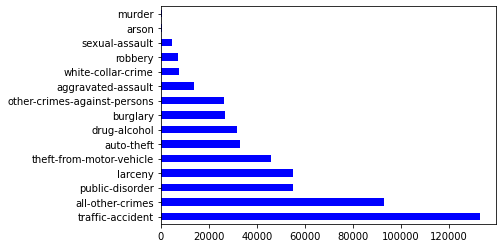

In [33]:
offense_occ.plot(kind ='barh', color ='blue')

In [34]:
# FIRST_OCCURRENCE_DATE 

df2[df2.OFFENSE_CATEGORY_ID == 'murder'].groupby(['OFFENSE_CATEGORY_ID', 'FIRST_OCCURRENCE_DATE']).FIRST_OCCURRENCE_DATE.count()

OFFENSE_CATEGORY_ID  FIRST_OCCURRENCE_DATE
murder               1/1/2016 9:21:00 AM      1
                     1/1/2017 10:59:00 PM     1
                     1/1/2020 1:44:00 AM      1
                     1/11/2017 6:37:00 PM     1
                     1/13/2015 7:57:00 AM     1
                                             ..
                     9/8/2017 6:00:00 AM      1
                     9/8/2019 7:27:00 PM      1
                     9/8/2020 11:30:00 AM     1
                     9/9/2019 4:46:00 PM      1
                     9/9/2020 5:12:00 PM      1
Name: FIRST_OCCURRENCE_DATE, Length: 376, dtype: int64

In [35]:
df2['FIRST_OCCURRENCE_DATE'] = pd.to_datetime(df2['FIRST_OCCURRENCE_DATE'], dayfirst=True)

#https://docs.python.org/3/library/time.html#time.strftime

In [36]:
df2['FIRST_OCCURRENCE_DATE'].head(10)

0   2018-12-27 15:58:00
1   2015-11-13 07:45:00
2   2017-08-06 13:15:00
3   2019-07-12 13:07:00
4   2018-12-22 20:15:00
5   2018-03-29 10:00:00
6   2016-07-21 18:40:00
7   2017-06-22 17:20:00
8   2018-07-13 08:22:00
9   2016-12-30 23:00:00
Name: FIRST_OCCURRENCE_DATE, dtype: datetime64[ns]

In [37]:
crime_year = df2['FIRST_OCCURRENCE_DATE'].dt.year.value_counts().sort_values(ascending = False)
crime_year
# this shows us that 2018 saw the highest incident of crime, coming in at 93,525

2018    93525
2017    93203
2016    91409
2019    89722
2015    89024
2020    77220
Name: FIRST_OCCURRENCE_DATE, dtype: int64

<AxesSubplot:>

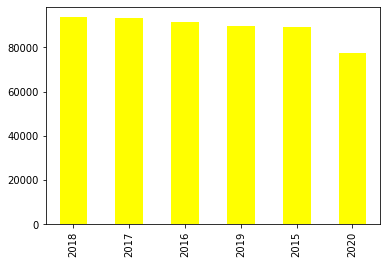

In [38]:
crime_year.plot(kind='bar', color = 'yellow')

In [39]:
df2['FIRST_OCCURRENCE_DATE'].dt.month.value_counts().sort_values(ascending = False)
# Taking a look at this: it seems like August saw the highest # of crimes over the 6 years, but overall, total # of crime seems to occur at the same rate throughout the year

8     48022
1     47335
7     47003
5     46512
10    46144
9     45932
6     45135
4     43461
3     43266
11    42360
2     40780
12    38153
Name: FIRST_OCCURRENCE_DATE, dtype: int64

In [40]:
murder_year = df2[df2.OFFENSE_CATEGORY_ID == 'murder']

In [41]:
murder_year

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
670,2016157234,2016157234091200,912,0,homicide-other,murder,2016-12-03 00:01:00,3/12/2016 6:10:00 AM,3/12/2016 6:11:00 AM,4850 MORRISON RD,3126750.0,1679758.0,-105.049551,39.698873,4,412,westwood,1,0
835,2015162091,2015162091091200,912,0,homicide-other,murder,2015-03-24 20:28:00,NaN,3/24/2015 11:40:00 PM,E 16TH AVE / N VALENTIA ST,3171066.0,1695718.0,-104.891683,39.741978,2,223,east-colfax,1,0
4104,2016650107,2016650107545000,5450,0,traf-vehicular-homicide,murder,2016-10-10 18:40:00,NaN,10/10/2016 6:40:00 PM,4300 BLOCK N COLORADO BLVD,3157275.0,1708434.0,-104.940445,39.777129,2,221,northeast-park-hill,1,1
4509,2016444896,2016444896091200,912,0,homicide-other,murder,2016-07-14 10:45:00,NaN,7/14/2016 11:01:00 AM,150 N QUEBEC ST,3168090.0,1687320.0,-104.902462,39.718978,3,321,lowry-field,1,0
6785,201887517,201887517091200,912,0,homicide-other,murder,2018-05-02 22:00:00,2/6/2018 7:22:00 AM,2/6/2018 8:51:00 AM,8200 BLK E COLFAX AVE,3170985.0,1694952.0,-104.891990,39.739877,2,223,east-colfax,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532345,2020213216,2020213216091200,912,0,homicide-other,murder,2020-08-04 15:00:00,4/8/2020 3:10:00 PM,4/8/2020 5:31:00 PM,900 BLK S CLAY ST,3134871.0,1679818.0,-105.020690,39.698924,4,412,athmar-park,1,0
532578,2020220574,2020220574091200,912,0,homicide-other,murder,2020-11-04 19:58:00,NaN,4/11/2020 9:22:00 PM,NaN,3128353.0,1675820.0,-105.043925,39.688041,4,421,mar-lee,1,0
533294,2020561217,2020561217091200,912,0,homicide-other,murder,2020-09-18 01:39:00,9/18/2020 1:41:00 AM,9/18/2020 1:41:00 AM,NaN,3168151.0,1707259.0,-104.901779,39.773713,5,512,central-park,1,0
533650,2020497138,2020497138091200,912,0,homicide-other,murder,2020-08-16 22:38:00,NaN,8/16/2020 10:38:00 PM,NaN,3133608.0,1684273.0,-105.025095,39.711172,4,412,westwood,1,0


In [42]:
murder_year.OFFENSE_TYPE_ID.value_counts()
# Homicide-other seems to be the leading murder type

homicide-other             314
homicide-family             30
traf-vehicular-homicide     27
homicide-police-by-gun       4
homicide-negligent           2
Name: OFFENSE_TYPE_ID, dtype: int64

In [43]:
murder_year.FIRST_OCCURRENCE_DATE.dt.year.value_counts()
# looking at this, 2020 saw the highest murder count! 

2020    80
2019    71
2017    58
2018    57
2015    57
2016    54
Name: FIRST_OCCURRENCE_DATE, dtype: int64

In [44]:
murder_year.FIRST_OCCURRENCE_DATE.dt.month.value_counts()
# Looking at this: September saw the highest # of murders over the 6 years

9     42
1     37
10    35
7     35
11    34
8     34
3     32
4     30
6     28
2     27
5     24
12    19
Name: FIRST_OCCURRENCE_DATE, dtype: int64

In [45]:
sex_crimes = df2[df2.OFFENSE_CATEGORY_ID == 'sexual-assault']
# Now let's take a deeper look into the sex crimes

In [46]:
sex_crimes.OFFENSE_TYPE_ID.value_counts()
# Rape seems to the the leading sex crimes here in Denver

sex-aslt-rape                     2571
sex-aslt-fondle-adult-victim       912
sex-aslt-non-rape                  659
sex-aslt-rape-pot                  184
sex-aslt-non-rape-pot              167
sex-aslt-w-object                   39
sex-asslt-sodomy-man-strng-arm      22
sex-aslt-w-object-pot               12
Name: OFFENSE_TYPE_ID, dtype: int64

In [47]:
sex_crimes['NEIGHBORHOOD_ID'].value_counts()

# Once again, it seems like five points is leading the count 

five-points     326
capitol-hill    185
cbd             184
lincoln-park    179
montbello       177
               ... 
cory-merrill     12
skyland           9
country-club      5
indian-creek      3
wellshire         2
Name: NEIGHBORHOOD_ID, Length: 78, dtype: int64

In [48]:
sex_crimes['FIRST_OCCURRENCE_DATE'].dt.year.value_counts()
# 2017 saw a high number of sex crimes, but surprisingly, by 2020, the numbers had reduced substaintially

2017    874
2018    855
2019    840
2016    732
2015    700
2020    565
Name: FIRST_OCCURRENCE_DATE, dtype: int64

In [49]:
sex_crimes['FIRST_OCCURRENCE_DATE'].dt.month.value_counts()


1     633
10    406
8     386
7     378
6     372
9     369
3     365
5     351
4     350
11    333
2     312
12    311
Name: FIRST_OCCURRENCE_DATE, dtype: int64

In [50]:
# it would be interesting to group this months and years by season, and see which 3 month period has the highest rate of crime


In [51]:
# Let's try a map plot 
# https://towardsdatascience.com/how-to-build-an-immersive-geo-bubble-map-with-plotly-bb20eb70414f 
# This is a good basic tutorial for map...but is there really a need to do this? Tableau seems easier... 